## **Project Name: Zomato Review System Sentiments Analysis**

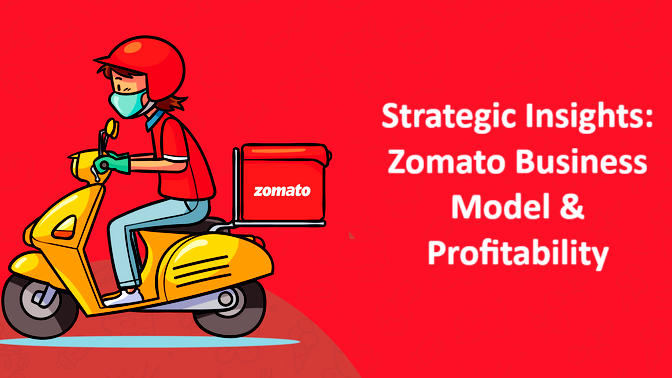

### **Problem Definition:**

In [1]:
# Import Data manipulation Library 
import numpy as np 
import pandas as pd
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt 
# Import Filter Warning Libraries 
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='sentiments.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(name)s - %(funcName)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    force=True)

In [2]:
# Loading Zomato Restaurant names and Metadata Dataset 
Hotel = pd.read_csv('E:\BootCamp_2025\EDA\Zomato Analysis\Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
Reviews = pd.read_csv('E:\BootCamp_2025\EDA\Zomato Analysis\Zomato Restaurant reviews.csv')

In [3]:
Hotel.sample(frac = 1)

,Name,Links,Cost,Collections,Cuisines,Timings
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
91,Cascade - Radisson Hyderabad Hitec City,https://www.zomato.com/hyderabad/cascade-radis...,"1,800",NaN,"North Indian, Italian, Continental, Asian",24 Hours
37,Kritunga Restaurant,https://www.zomato.com/hyderabad/kritunga-rest...,500,NaN,"Andhra, Biryani, Hyderabadi, North Indian","12 Noon to 4 PM, 7 PM to 11 PM"
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
...,...,...,...,...,...,...
93,Zing's Northeast Kitchen,https://www.zomato.com/hyderabad/zings-northea...,550,NaN,"North Eastern, Momos","11:30 AM to 4 PM, 7 PM to 11 PM"
20,13 Dhaba,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,Veggie Friendly,North Indian,"12:30 PM to 10 PM (Tue-Sun), Mon Closed"
43,The Foodie Monster Kitchen,https://www.zomato.com/hyderabad/the-foodie-mo...,500,"Great Breakfasts, Late Night Restaurants, Best...","American, Wraps, Desserts",7 AM to 1 AM
41,Karachi Bakery,https://www.zomato.com/hyderabad/karachi-baker...,500,NaN,"Bakery, Fast Food, Desserts",10 AM to 10 PM


In [4]:
Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [5]:
Reviews.sample(frac = 1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2591,Tiki Shack,Vikrant Nakhate,Greetings. The place is very ambient. Roof-top...,4,"10 Reviews , 11 Followers",2/17/2019 20:12,0
3656,Banana Leaf Multicuisine Restaurant,Mahesh Sarma,Awesome food taste,5,"1 Review , 1 Follower",7/24/2018 21:43,0
1178,Barbeque Nation,Salman.Ghaffoor,Went for lunch along with wife and bro for bir...,4,"21 Reviews , 33 Followers",7/7/2018 18:59,9
4483,La La Land - Bar & Kitchen,Deepak Tiwari,The ambience is pretty decent. It is a moderat...,4,"1 Review , 78 Followers",11/23/2018 23:37,0
3291,Marsala Food Company,Prithvi Krishna,Extraordinary food I love the chef food is soo...,5,"15 Reviews , 19 Followers",2/17/2019 23:16,0
...,...,...,...,...,...,...,...
116,Paradise,Laxmikanth M,I ordered Chicken biryani and egg biriyani. Fo...,5,"1 Review , 1 Follower",5/24/2019 21:17,0
9769,Zega - Sheraton Hyderabad Hotel,Koushik Reddy,This place have some really good food and it's...,5,"2 Reviews , 7 Followers",7/6/2018 18:41,0
2339,Amul,RahulRaji,worst taste,1,"2 Reviews , 1 Follower",8/14/2018 16:07,0
6937,The Indi Grill,Vikas Kalakonda,Good ambiene...Good food..Extra ordinary servi...,5,"4 Reviews , 8 Followers",5/7/2019 14:35,0


In [6]:
logging.info('Dataset Uploaded Successfully...')

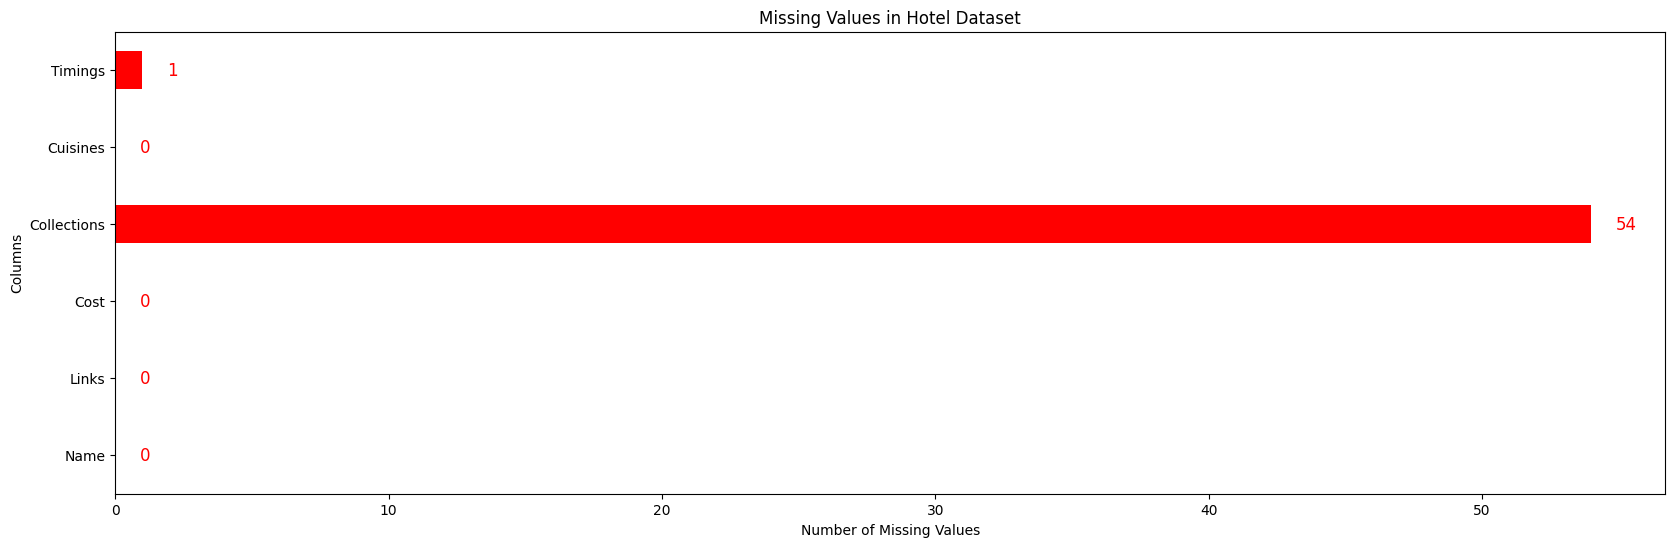

In [7]:
# Checking Missing Information in Zomato Restaurant Dataset

# Plot missing values
missing_values = Hotel.isnull().sum()
ax = missing_values.plot(kind='barh', color='red', figsize=(20, 6))

# Add numbers to bars
for i, v in enumerate(missing_values):
    plt.text(v + 0.89, i, str(v), color='red', fontsize=12, va='center')

plt.title("Missing Values in Hotel Dataset")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()

In [8]:
# Calculate percentage of missing values
missing_percent = (Hotel.isnull().sum() / len(Hotel)) * 100
print(f"The Missing Percentage:\n{missing_percent.round(2)}%")

The Missing Percentage:
Name            0.00
Links           0.00
Cost            0.00
Collections    51.43
Cuisines        0.00
Timings         0.95
dtype: float64%


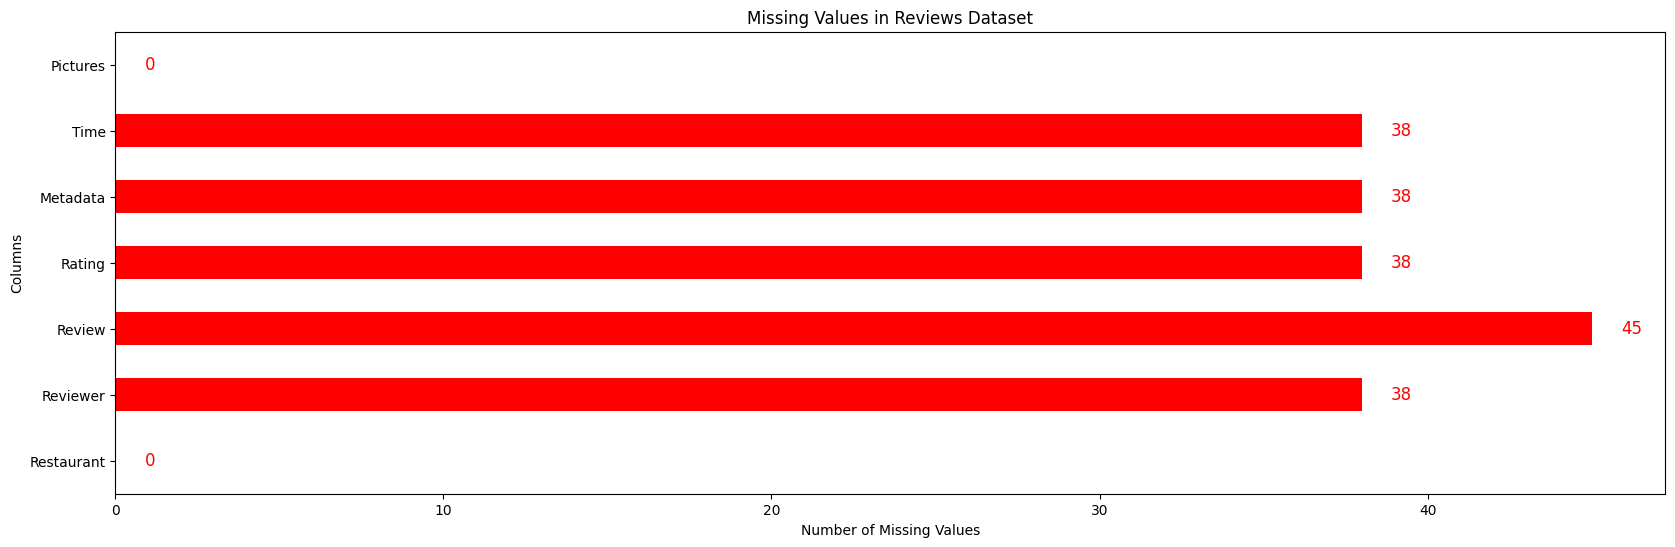

In [9]:
# Plot missing values
missing_values = Reviews.isnull().sum()
ax = missing_values.plot(kind='barh', color='red', figsize=(20, 6))

# Add numbers to bars
for i, v in enumerate(missing_values):
    plt.text(v + 0.89, i, str(v), color='red', fontsize=12, va='center')

plt.title("Missing Values in Reviews Dataset")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()

There are two datasets given:

1. Restaurant Names and metadata:
   * There are 105 records and 6 features in metadata.
   * There are missing or null values in Colllections and timings.
   * There are no duplicated values.
   * Cost must be int type but it contains comma(,) , hence its datatype is object here.
   * Timings represent the time from when the restaurant opens till end time when restaurants shut down, but it is given in the form of text, hence object datatype.

2. Reviews dataset:
   * There are 10000 records(or Reviewss) given with 7 features.
   * Except Name of Restaurants and Number of picture posted, There are null values.
   * There are some of the duplicated values for restaurnts which can be dropped(Since it contains null values for all the columns).
   * Rating must be integer but it contais value 'like', hence it is object datatype.

In [10]:
Hotel

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [11]:
# checking  Stats

Hotel.describe(include  = 'all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [12]:
Hotel['Cuisines'][:10]

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
5      Seafood, Goan, North Indian, Continental, Asian
6    Healthy Food, North Indian, Continental, South...
7                                             Lebanese
8    American, Chinese, North Indian, Kebab, South ...
9                                  Ice Cream, Desserts
Name: Cuisines, dtype: object

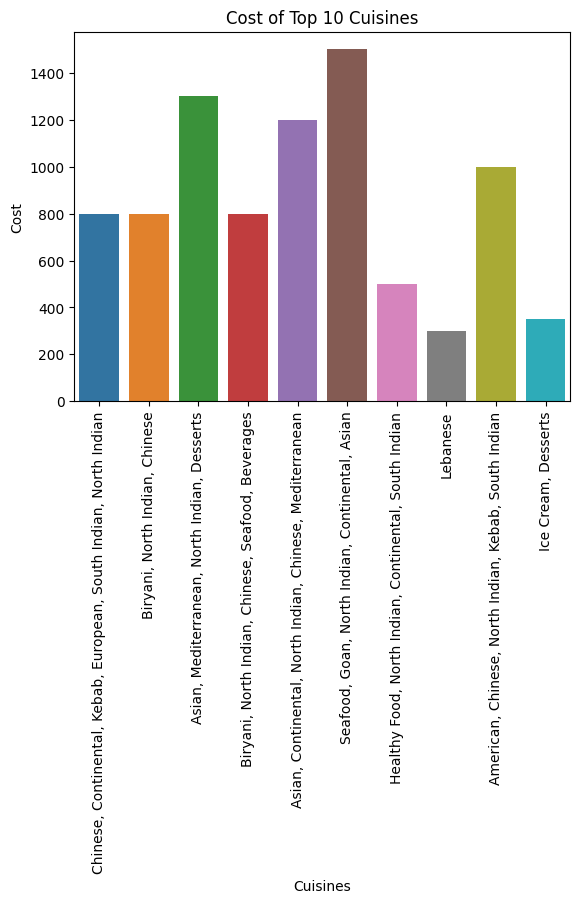

In [13]:
# Convert 'Cost' column to numeric value
Hotel['Cost'] = Hotel['Cost'].astype(str).str.replace(',', '').astype(float)

# Plot the bar chart for the top 10 cuisines by average cost
sns.barplot(x=Hotel['Cuisines'][:10], y=Hotel['Cost'][:10])
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Cost")
plt.title("Cost of Top 10 Cuisines")
plt.show()

### **Data Insights:**

In Hyderabad, a diverse range of 92 unique cuisines is served across various restaurants. Based on the analysis, the top 10 most popular cuisines are highlighted in the chart above.

The city is renowned for its Biryani, which holds a special place in Hyderabad's food culture. The average cost of Biryani is approximately ₹800 in most restaurants.

Apart from Biryani, people in Hyderabad crave a variety of cuisines, including Chinese, Continental, European, and Indian dishes. Both North Indian and South Indian cuisines are widely loved by locals and visitors alike.

Due to the high demand for seafood, the average cost of seafood dishes is approximately ₹1,500, making them one of the premium offerings in the city.

In [14]:
Reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [15]:
Reviews.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### **Data Insights:**

Hyderabad’s restaurant scene is shaped by a few dominant establishments, with Beyond Flavours being the most reviewed. Most reviewers contribute only once, while Parijat Ray is the most active with 13 reviews. Reviews are typically short, positive, and 5-star ratings are the most common, with "good" frequently mentioned, indicating overall satisfaction.

Customers engage minimally with images, relying mostly on text. Biryani is the most mentioned dish, averaging ₹800, while seafood, priced around ₹1,500, remains a premium choice. Chinese, Continental, and North Indian cuisines are also popular. Reviews highlight Hyderabad’s strong attachment to traditional flavors, with affordability and taste driving dining choices.

In [16]:
Reviews['Rating'] = pd.to_numeric(Reviews['Rating'], errors='coerce')
print(Reviews['Rating'].unique())

[5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5 nan]


<AxesSubplot: xlabel='Restaurant'>

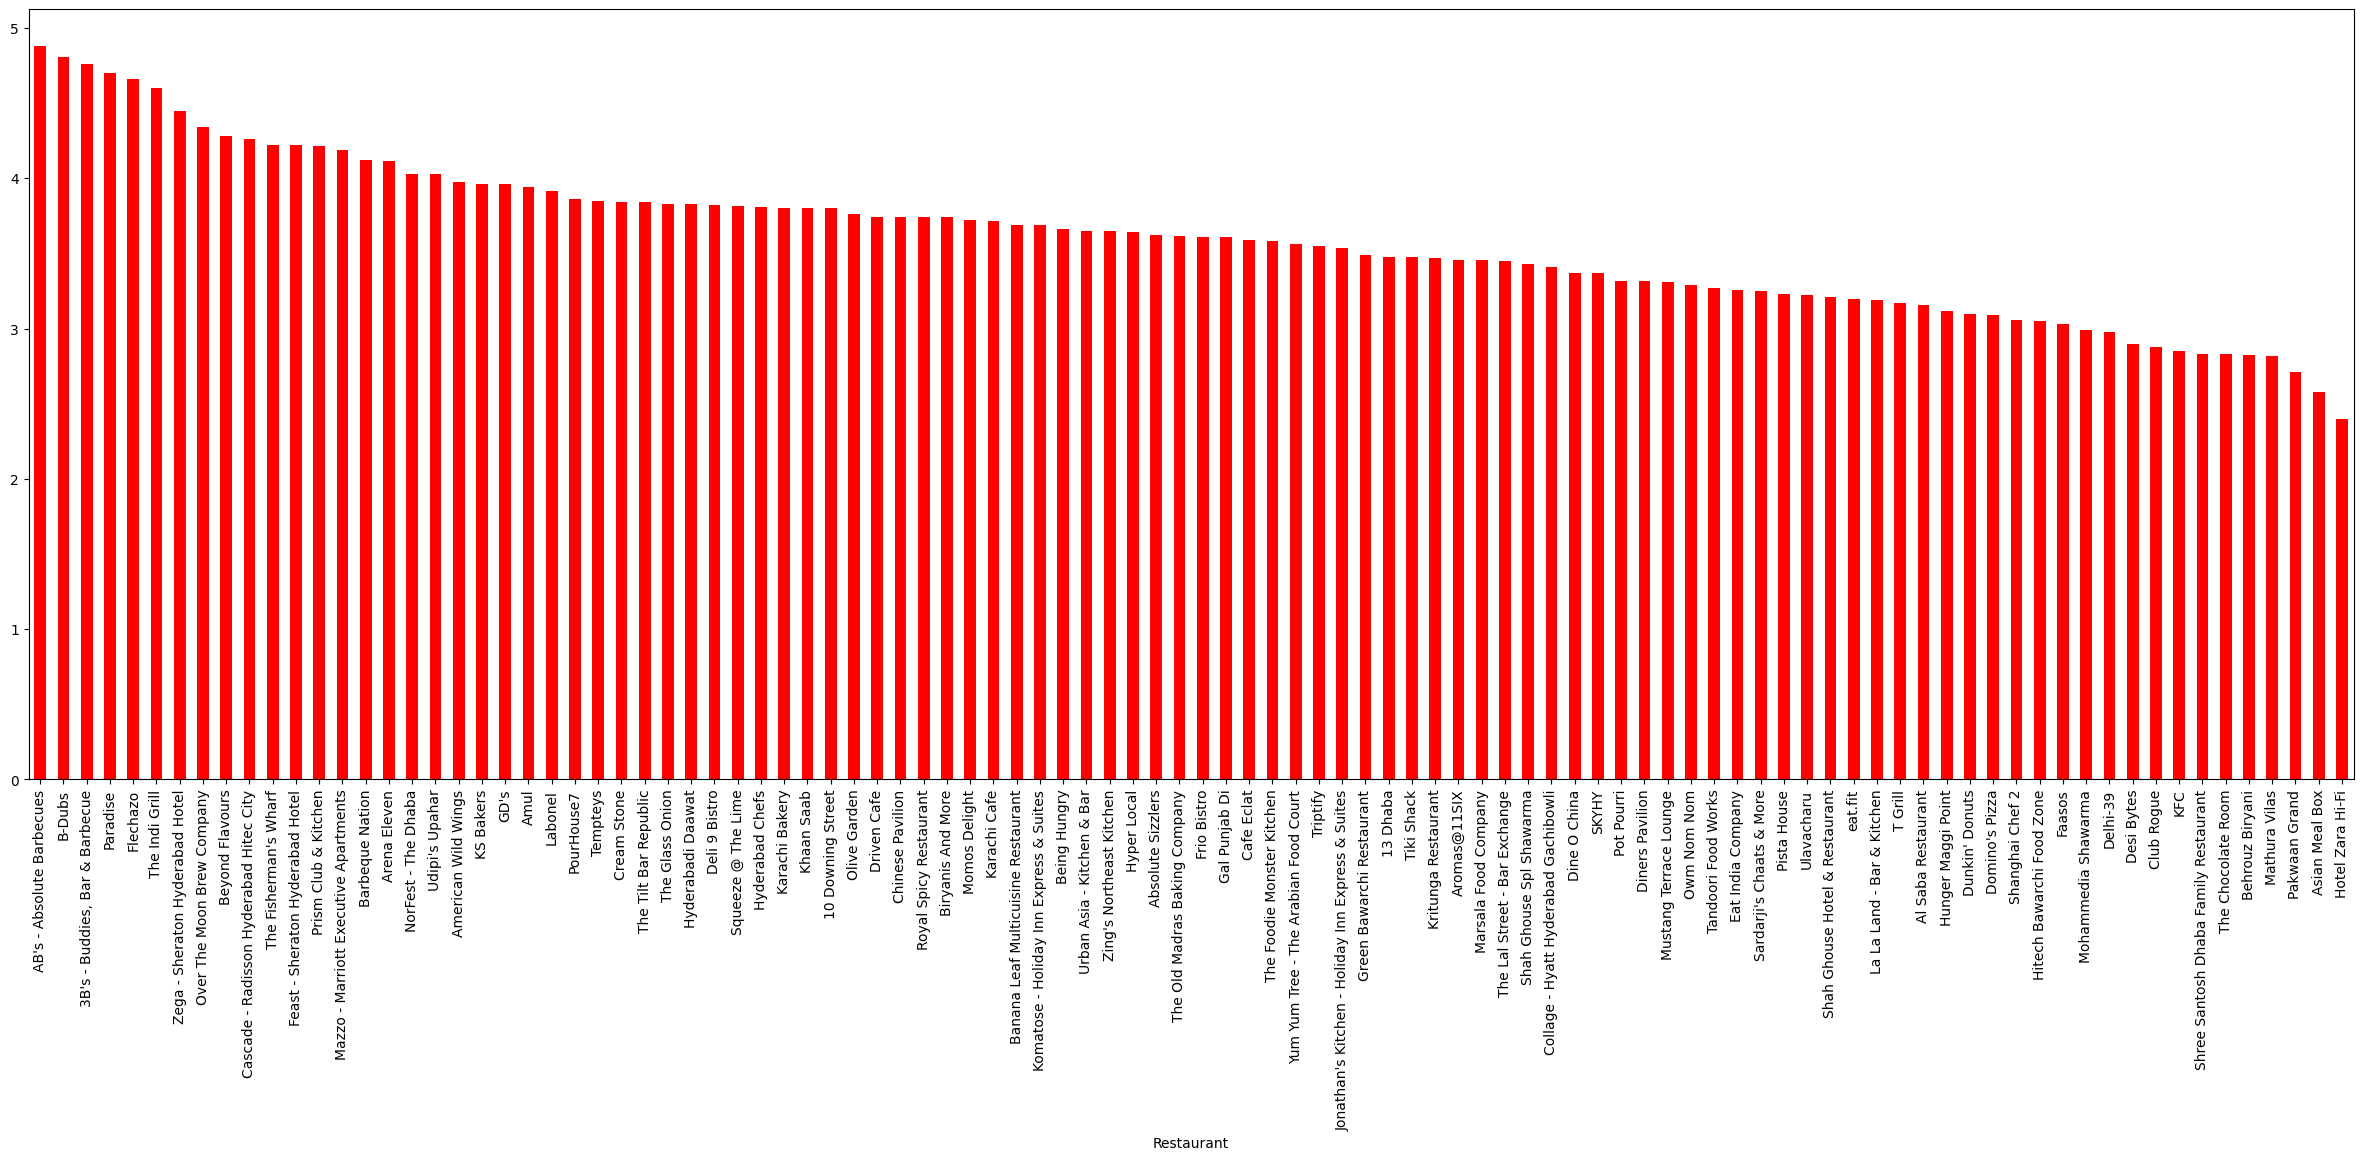

In [17]:
plt.figure(figsize= (30,10))
Reviews.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).plot(kind = 'bar',color = 'red')

In [18]:
#splitting the metadata into Reviews and Followers
Reviews['No_of_reviews'],Reviews['Followers'] = Reviews['Metadata'].str.split(',').str
Reviews['No_of_reviews'] = pd.to_numeric(Reviews['No_of_reviews'].str.split(' ').str[0])
Reviews['Followers'] = pd.to_numeric(Reviews['Followers'].str.split(' ').str[1])
Reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,No_of_reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53.0,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2.0,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65.0,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13.0,144.0


In [19]:
# Filling the null values of Followes with 0
Reviews['Followers'].fillna(0,inplace=True)

In [20]:
# Converting Time to date time and extracting Hour and year 
Reviews['Time']=pd.to_datetime(Reviews['Time'])
Reviews['Year']=pd.DatetimeIndex(Reviews['Time']).year
Reviews['Month']=pd.DatetimeIndex(Reviews['Time']).month
Reviews['Hour'] = pd.DatetimeIndex(Reviews['Time']).hour  

In [21]:
Reviews.drop(columns=['Metadata','Time'],axis =1, inplace= True)

In [22]:
Reviews

,Restaurant,Reviewer,Review,Rating,Pictures,No_of_reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,13.0,144.0,2016.0,5.0,17.0


In [23]:
rating_crosstab = pd.crosstab(index=Reviews['Month'], columns=Reviews['Restaurant'], values=Reviews['Rating'], aggfunc='mean')

rating_crosstab.T

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Restaurant,,,,,,,,,,,,
10 Downing Street,4.235294,3.666667,3.800000,3.928571,3.250000,NaN,NaN,NaN,NaN,3.555556,4.214286,3.300000
13 Dhaba,3.545455,3.222222,3.600000,2.875000,3.500000,NaN,NaN,3.368421,3.571429,3.812500,3.333333,3.833333
"3B's - Buddies, Bar & Barbecue",NaN,NaN,NaN,4.656250,4.808824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB's - Absolute Barbecues,NaN,NaN,NaN,NaN,4.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Absolute Sizzlers,NaN,4.142857,3.487805,3.885714,3.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Urban Asia - Kitchen & Bar,3.357143,3.777778,3.285714,3.714286,3.714286,NaN,NaN,3.636364,2.777778,4.625000,3.666667,3.428571
Yum Yum Tree - The Arabian Food Court,3.428571,4.666667,3.285714,3.375000,4.000000,NaN,3.193548,3.400000,3.428571,4.400000,3.285714,4.800000
Zega - Sheraton Hyderabad Hotel,4.750000,4.000000,4.333333,4.466667,4.333333,3.727273,4.642857,4.583333,4.666667,4.444444,5.000000,4.800000


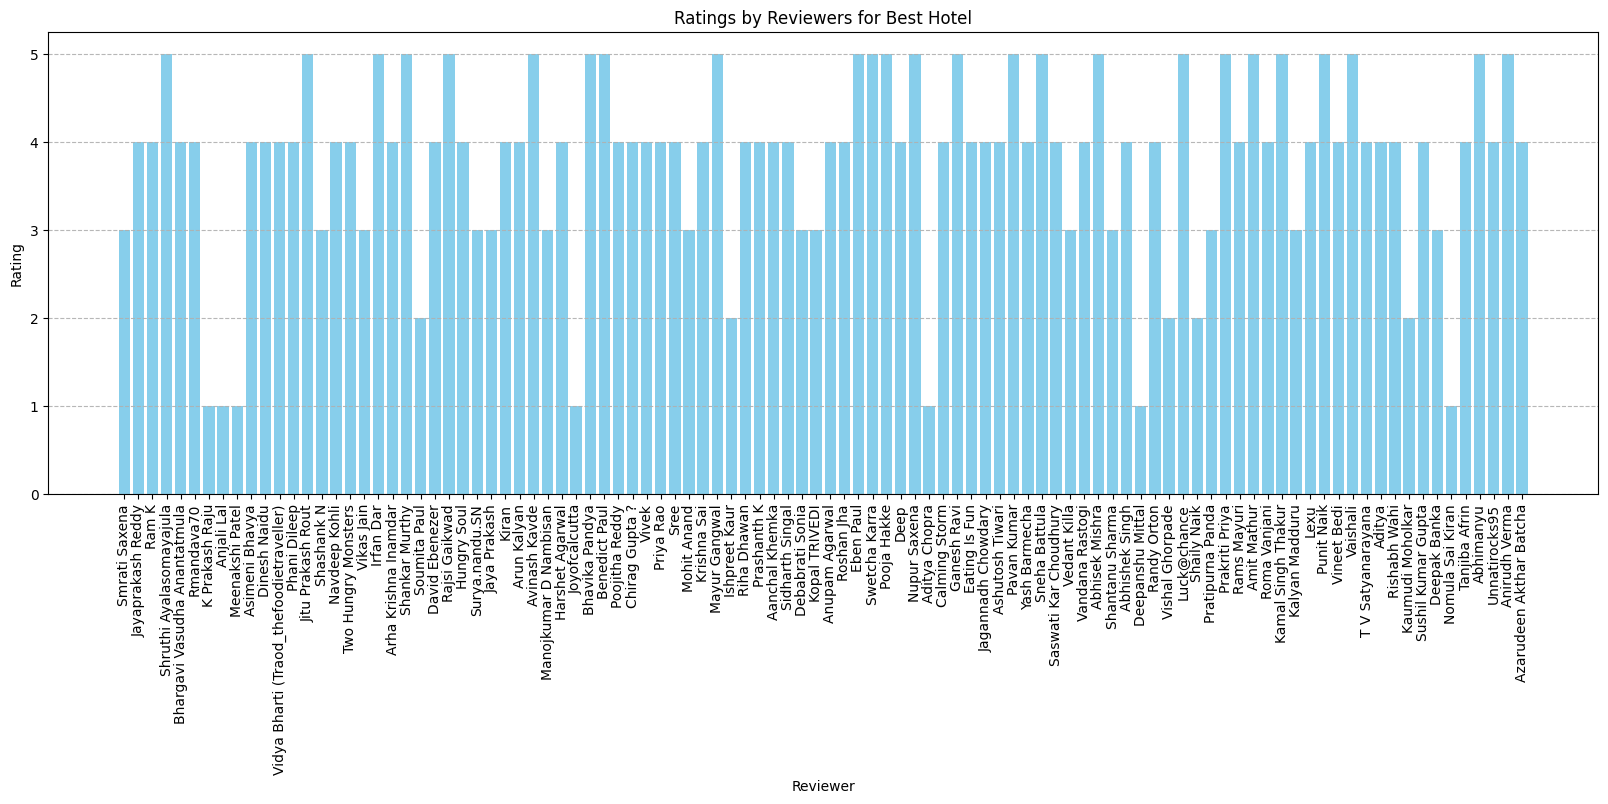

In [24]:
# Best Hotel base on ratings 
Best_Hotel = Reviews[Reviews['Restaurant']== '10 Downing Street']
plt.figure(figsize=(20, 6))  # Adjust size if necessary
plt.bar(Best_Hotel['Reviewer'], Best_Hotel['Rating'], color='skyblue')

plt.xlabel('Reviewer')
plt.ylabel('Rating')
plt.title('Ratings by Reviewers for Best Hotel')

plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.9)  

plt.show()

In [25]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [26]:
# Sentiment Analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))  # Convert to string to avoid errors
    compound = sentiment['compound']
    
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis on the 'Review' column
Reviews['Sentiment'] = Reviews['Review'].apply(get_sentiment)

# Display some results
print(Reviews[['Review', 'Sentiment']].head(10))

                                              Review Sentiment
0  The ambience was good, food was quite good . h...  Positive
1  Ambience is too good for a pleasant evening. S...  Positive
2  A must try.. great food great ambience. Thnx f...  Positive
3  Soumen das and Arun was a great guy. Only beca...  Positive
4  Food is good.we ordered Kodi drumsticks and ba...  Positive
5  Ambiance is good, service is good, food is aPr...  Positive
6  Its a very nice place, ambience is different, ...  Positive
7  Well after reading so many reviews finally vis...  Positive
8  Excellent food , specially if you like spicy f...  Positive
9  Came for the birthday treat of a close friend....  Positive


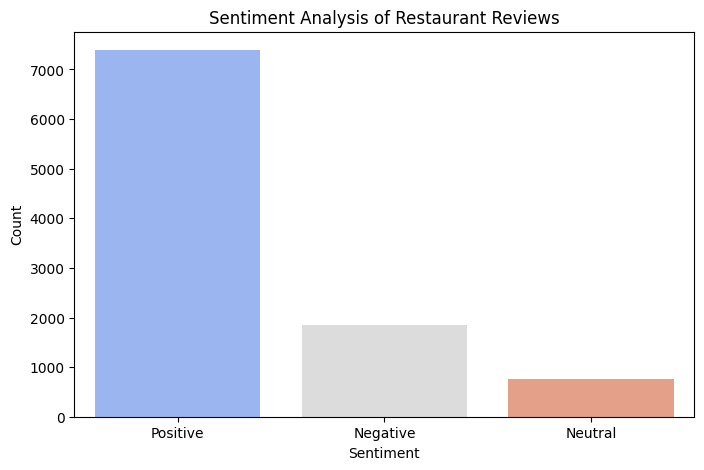

In [27]:
# Plotting sentiment Analysis
plt.figure(figsize=(8,5))
sns.countplot(x=Reviews['Sentiment'], palette='coolwarm')
plt.title("Sentiment Analysis of Restaurant Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [28]:
sentiment_by_restaurant = Reviews.groupby(['Restaurant', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_restaurant

Sentiment,Negative,Neutral,Positive
Restaurant,,,
10 Downing Street,13,2,85
13 Dhaba,16,18,66
"3B's - Buddies, Bar & Barbecue",5,1,94
AB's - Absolute Barbecues,1,0,99
Absolute Sizzlers,20,3,77
...,...,...,...
Urban Asia - Kitchen & Bar,16,0,84
Yum Yum Tree - The Arabian Food Court,17,10,73
Zega - Sheraton Hyderabad Hotel,4,0,96


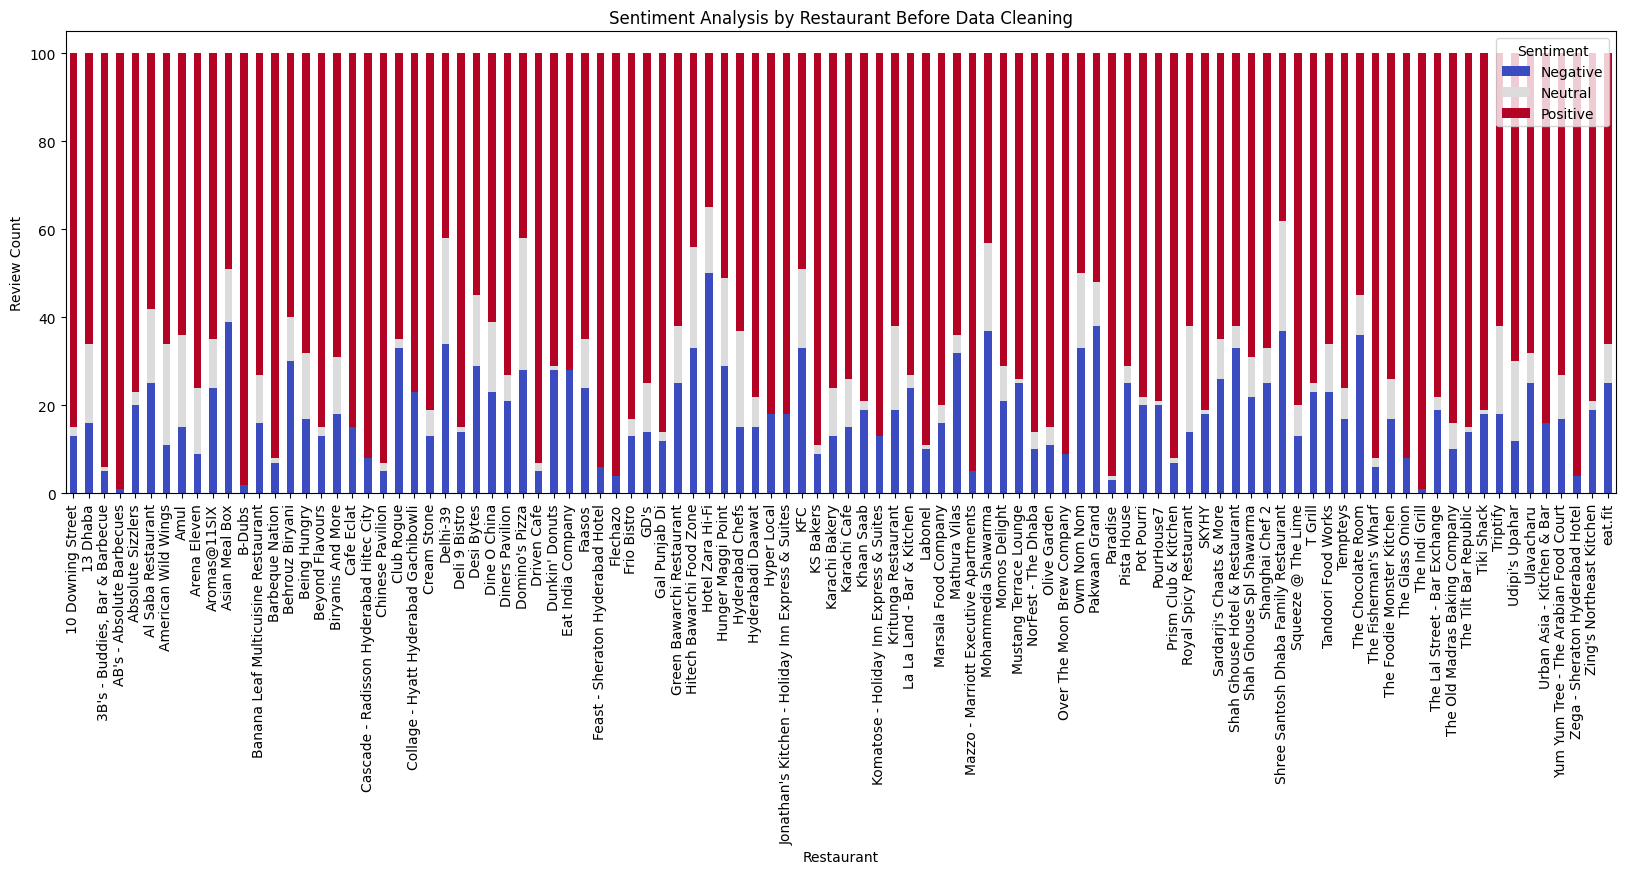

In [29]:
sentiment_by_restaurant.plot(kind='bar', stacked=True, figsize=(20,6), colormap='coolwarm')

plt.title("Sentiment Analysis by Restaurant Before Data Cleaning")
plt.xlabel("Restaurant")
plt.ylabel("Review Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=90)
plt.show()

In [30]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     10000 non-null  object 
 1   Reviewer       9962 non-null   object 
 2   Review         9955 non-null   object 
 3   Rating         9961 non-null   float64
 4   Pictures       10000 non-null  int64  
 5   No_of_reviews  9962 non-null   float64
 6   Followers      10000 non-null  float64
 7   Year           9962 non-null   float64
 8   Month          9962 non-null   float64
 9   Hour           9962 non-null   float64
 10  Sentiment      10000 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


### Drop rows where Review or Rating is missing ###
Reviews.dropna(subset=['Review', 'Rating'], inplace=True)

### Fill missing values in numeric columns ###
Reviews['No_of_reviews'].fillna(0, inplace=True)
Reviews['Year'].fillna(Reviews['Year'].median(), inplace=True)
Reviews['Month'].fillna(Reviews['Month'].median(), inplace=True)
Reviews['Hour'].fillna(Reviews['Hour'].median(), inplace=True)

### Clean the Review Text ###
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Remove stopwords & lemmatize
    return text

Reviews['Cleaned_Review'] = Reviews['Review'].apply(clean_text)

# Save cleaned dataset
Reviews.to_csv("cleaned_reviews.csv", index=False)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9954 non-null   object 
 1   Reviewer        9954 non-null   object 
 2   Review          9954 non-null   object 
 3   Rating          9954 non-null   float64
 4   Pictures        9954 non-null   int64  
 5   No_of_reviews   9954 non-null   float64
 6   Followers       9954 non-null   float64
 7   Year            9954 non-null   float64
 8   Month           9954 non-null   float64
 9   Hour            9954 non-null   float64
 10  Sentiment       9954 non-null   object 
 11  Cleaned_Review  9954 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1011.0+ KB


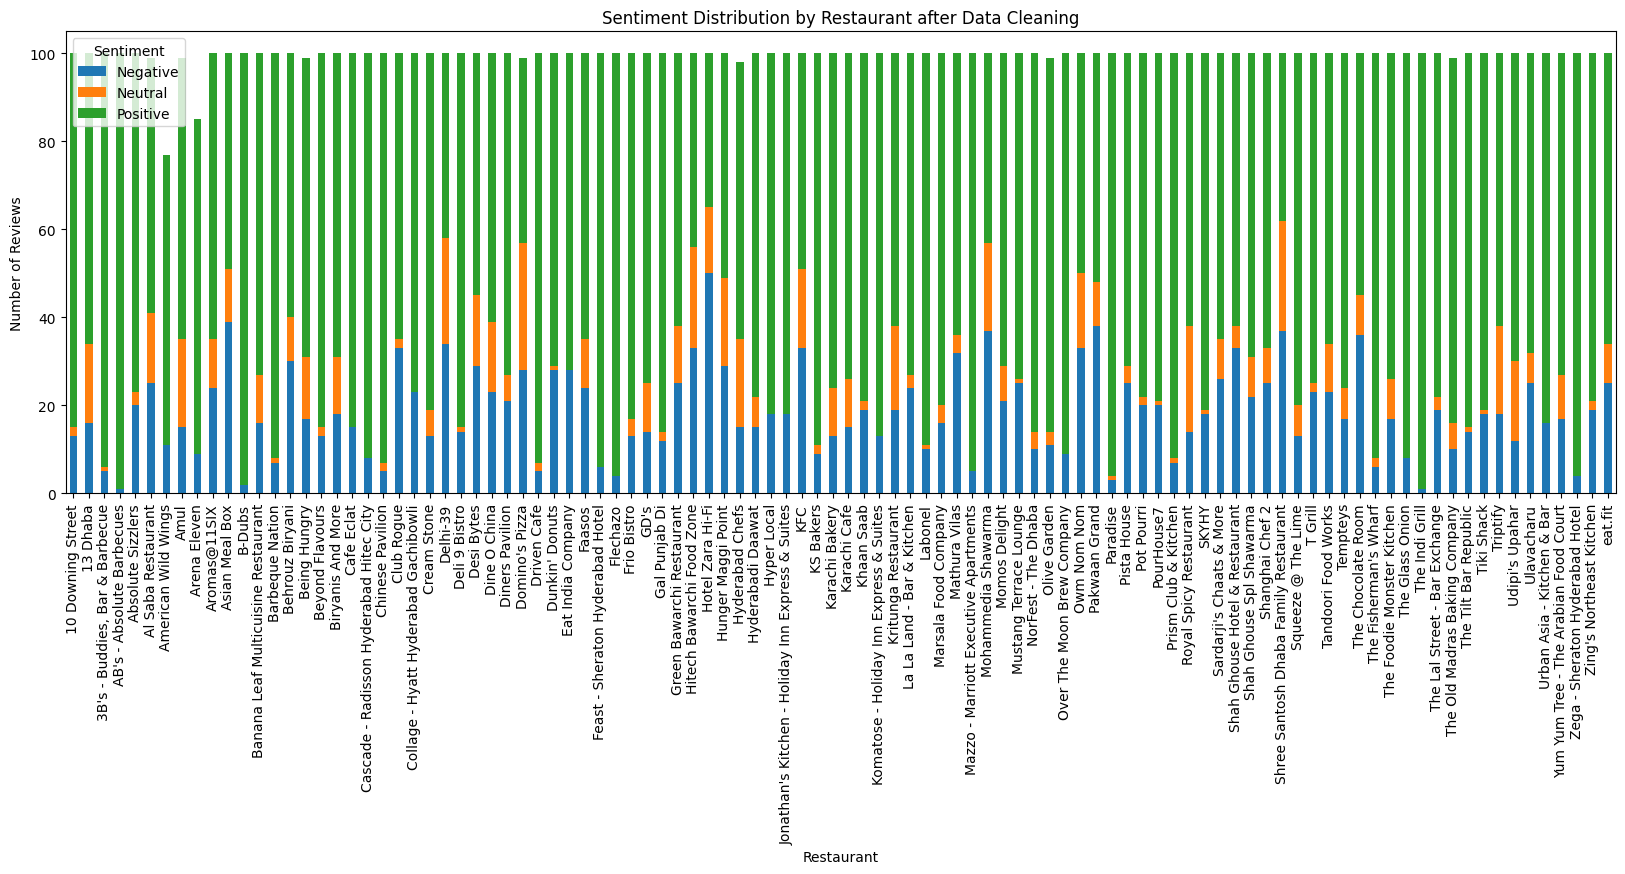

In [33]:
# Group by Restaurant and Sentiment
sentiment_by_restaurant = Reviews.groupby(['Restaurant', 'Sentiment']).size().unstack(fill_value=0)

# Plot
sentiment_by_restaurant.plot(kind='bar', stacked=True, figsize=(20,6))
plt.xlabel("Restaurant")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution by Restaurant after Data Cleaning")
plt.legend(title="Sentiment")
plt.xticks(rotation=90)
plt.show()

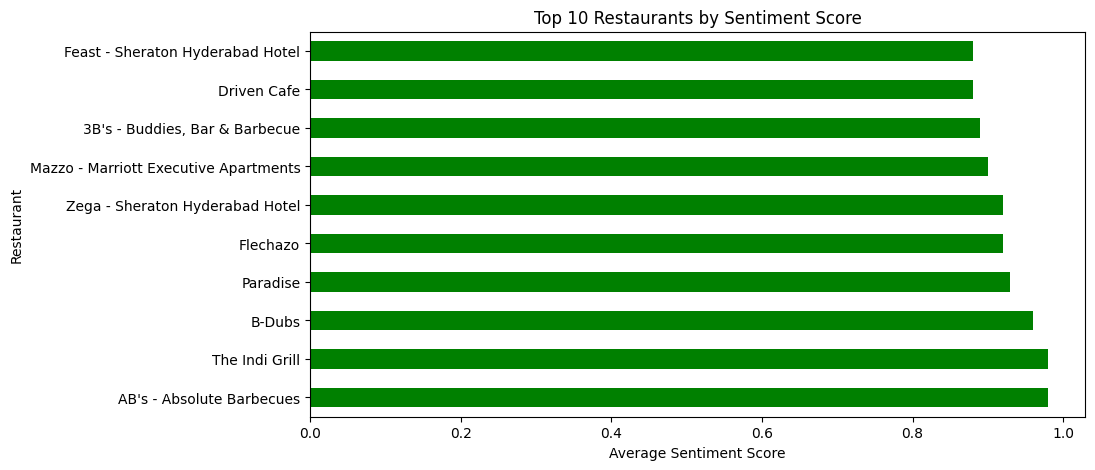

In [34]:
# Assign sentiment scores: Positive = 1, Neutral = 0, Negative = -1
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
Reviews['Sentiment_Score'] = Reviews['Sentiment'].map(sentiment_mapping)

# Calculate average sentiment score per restaurant
restaurant_sentiment_score = Reviews.groupby('Restaurant')['Sentiment_Score'].mean().sort_values(ascending=False)

# Plot top 10 restaurants with highest sentiment score
restaurant_sentiment_score.head(10).plot(kind='barh', figsize=(10,5), color='green')
plt.xlabel("Average Sentiment Score")
plt.ylabel("Restaurant")
plt.title("Top 10 Restaurants by Sentiment Score")
plt.show()